In [10]:
from datetime import datetime

import autograd.numpy as np
import capytaine as cpy
import matplotlib.pyplot as plt
from scipy.optimize import brute

import wecopttool as wot
import xarray as xr

Text(0.5, 0, 'Total simulation time (minutes)')

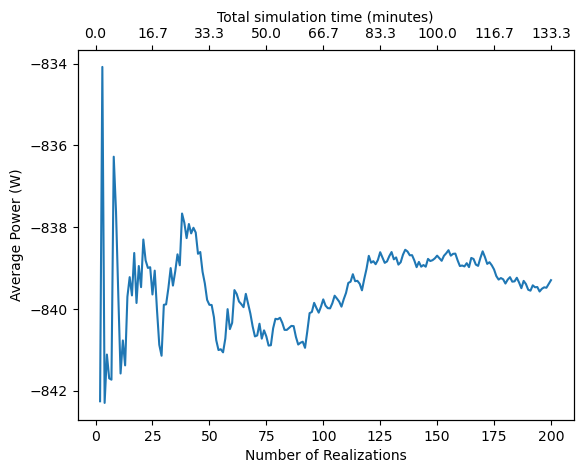

In [11]:
# load results

res_ds = xr.load_dataset('pioneer_power_convergence.nc')

rolling_mean = []

for ind in range(len(res_ds['power'])):

    rolling_mean.append(np.mean(res_ds['power'][0:ind]))
    
realization_number = range(1,len(res_ds['power'])+1)
    
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ax1.plot(realization_number,rolling_mean)
ax1.set_xlabel('Number of Realizations')
ax1.set_ylabel('Average Power (W)')

# also plot total time
tperreal = 1/.025

def tick_function(X):
    V = tperreal*X/60
    return ["%.1f" % z for z in V]

ax2.set_xticks(ax1.get_xticks())
ax2.set_xbound(ax1.get_xbound())
ax2.set_xticklabels(tick_function(ax1.get_xticks()))
ax2.set_xlabel('Total simulation time (minutes)')

Text(0.5, 0, 'Total simulation time (minutes)')

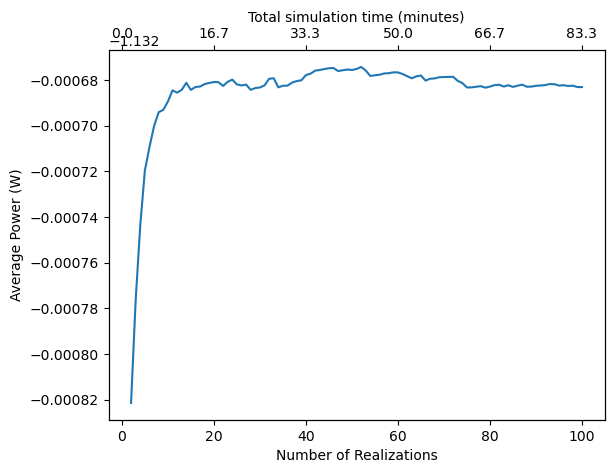

In [12]:
# load results

res_ds = xr.load_dataset('lupa_power_convergence.nc')

rolling_mean = []

for ind in range(len(res_ds['power'])):

    rolling_mean.append(np.mean(res_ds['power'][0:ind]))
    
realization_number = range(1,len(res_ds['power'])+1)    

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ax1.plot(realization_number,rolling_mean)
ax1.set_xlabel('Number of Realizations')
ax1.set_ylabel('Average Power (W)')

# also plot total time
tperreal = 1/.02

def tick_function(X):
    V = tperreal*X/60
    return ["%.1f" % z for z in V]

ax2.set_xticks(ax1.get_xticks())
ax2.set_xbound(ax1.get_xbound())
ax2.set_xticklabels(tick_function(ax1.get_xticks()))
ax2.set_xlabel('Total simulation time (minutes)')

[45.0, 30.0, 22.0, 18.0, 15.0, 13.0, 11.0, 10.0, 9.0, 8.0, 8.0]


C:\Users\jtgrasb\AppData\Local\Temp\ipykernel_21164\1842853648.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  V = [(1/(fend/nfreq)) for nfreq in X]


(-53100.0, -53050.0)

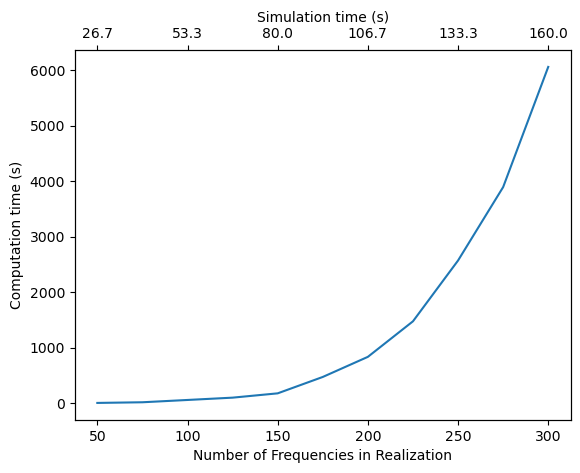

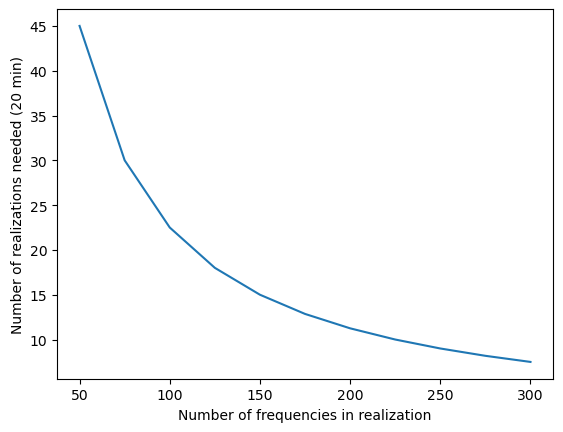

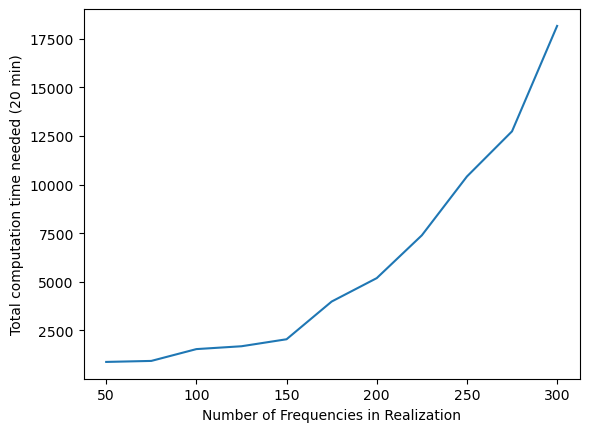

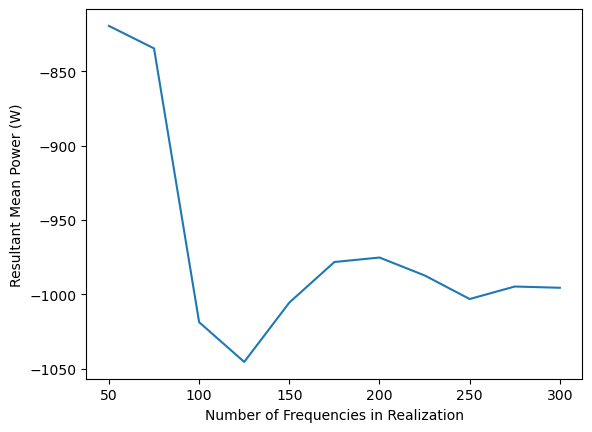

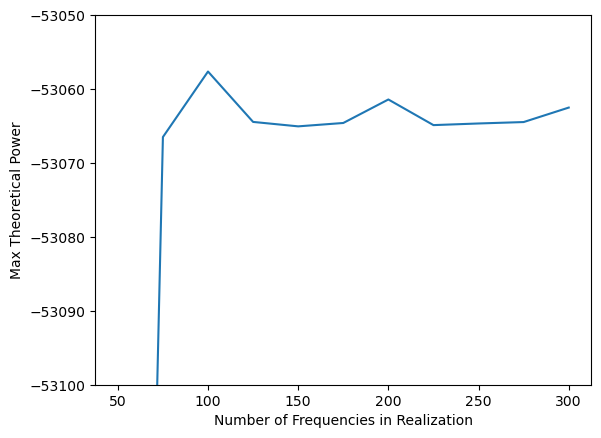

In [18]:
import xarray as xr
nfreqs = np.linspace(50,300,11)
fend = 1.875

res_ds = xr.load_dataset('pioneer_freq_time.nc')

runtime = res_ds['time'].values
meanpower = res_ds['power'].values
maxpower = res_ds['pmax'].values

nrealizations_needed = [np.round(minutes_needed*60*(fend/nfreq)) for nfreq in nfreqs]

print(nrealizations_needed)

# Plot the computation time vs. number of frequencies

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ax1.plot(nfreqs,runtime/nrealizations_needed)
ax1.set_xlabel('Number of Frequencies in Realization')
ax1.set_ylabel('Computation time (s)')

# also plot total time
tperreal = 1/.02

def tick_function(X):
    V = [(1/(fend/nfreq)) for nfreq in X]
    return ["%.1f" % z for z in V]

ax2.set_xticks(ax1.get_xticks())
ax2.set_xbound(ax1.get_xbound())
ax2.set_xticklabels(tick_function(ax1.get_xticks()))
ax2.set_xlabel('Simulation time (s)')

# plot total simulation time for each number of frequencies

minutes_needed = 20
sim_times = [(1/(fend/nfreq)) for nfreq in nfreqs]

nrealizations_needed = [minutes_needed*60/sim_time for sim_time in sim_times]

#print(nrealizations_needed.type())
total_times = [a*b for a, b in zip(nrealizations_needed,runtime/20)]

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(nfreqs,nrealizations_needed)
ax1.set_xlabel('Number of frequencies in realization')
ax1.set_ylabel('Number of realizations needed (20 min)')

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(nfreqs,total_times)
ax1.set_xlabel('Number of Frequencies in Realization')
ax1.set_ylabel('Total computation time needed (20 min)')

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(nfreqs,meanpower)
ax1.set_xlabel('Number of Frequencies in Realization')
ax1.set_ylabel('Resultant Mean Power (W)')

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(nfreqs,maxpower)
ax1.set_xlabel('Number of Frequencies in Realization')
ax1.set_ylabel('Max Theoretical Power')
ax1.set_ylim([-53100, -53050])

Text(0.5, 0, 'Total simulation time (minutes)')

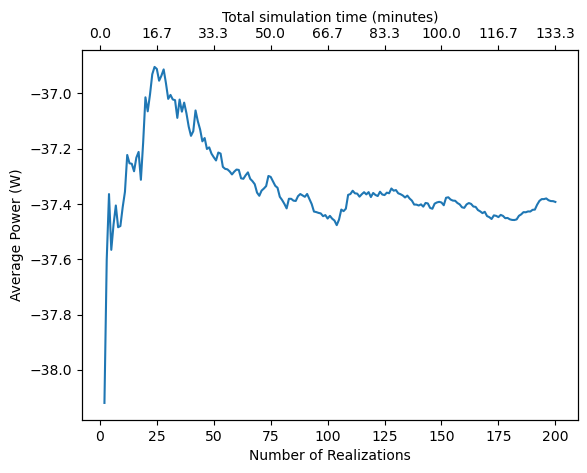

In [5]:
# load results
import xarray as xr
res_ds = xr.load_dataset('wavebot_power_convergence_025.nc')

rolling_mean = []

for ind in range(len(res_ds['power'])):

    rolling_mean.append(np.mean(res_ds['power'][0:ind]))
    
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ax1.plot(range(1,len(res_ds['power'])+1),rolling_mean)
ax1.set_xlabel('Number of Realizations')
ax1.set_ylabel('Average Power (W)')
#ax1.xlim([200, 400])
#ax1.ylim([-39.3,-39.0])
    
# also plot total time
tperreal = 1/.025

def tick_function(X):
    V = tperreal*X/60
    return ["%.1f" % z for z in V]

ax2.set_xticks(ax1.get_xticks())
ax2.set_xbound(ax1.get_xbound())
ax2.set_xticklabels(tick_function(ax1.get_xticks()))
ax2.set_xlabel('Total simulation time (minutes)')
    
